In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
from statsmodels.tsa.arima_model import ARMA
%matplotlib inline

In [2]:
data_path = '../SIGA/'
camp_folder = data_path + 'campamento/'
sierra_folder = data_path + 'sierraGorda/'

In [24]:
def r2(x,y):
    y_mean = np.mean(y)
    SStot = sum(np.power((y-y_mean),2))
    SSres = sum(np.power((x-y),2))
    r_square = 1-SSres/SStot
    return r_square[0]

In [45]:
# cargar datos metereologicos de campamento (spence)
# cargar datos metereologicos de sierraGorda (poblado)
name_cols_sg = ['Fecha_sg', 'hora_sg', 'DIR_sg', 'VEL_sg', 'TEMP_sg', 'HR_sg', 'PLUV_sg', 'RAD_SOLAR_sg']
name_cols_camp = ['Fecha_camp', 'hora_camp', 'DIR_camp', 'VEL_camp', 'TEMP_camp', 'HR_camp', 'PLUV_camp', 'RAD_SOLAR_camp']
camp_cols_dtypes = {'Fecha_camp':str, 'hora_camp':str, 'DIR_camp':float, 'VEL_camp':np.float64, 
               'TEMP_camp':np.float64, 'HR_camp':np.float64,'PLUV_camp':np.float64, 
               'RAD_SOLAR_camp':np.float64}
sg_cols_dtypes = {'Fecha_sg':str, 'hora_sg':str, 'DIR_sg':float, 'VEL_sg':np.float64, 
               'TEMP_sg':np.float64, 'HR_sg':np.float64,'PLUV_sg':np.float64, 
               'RAD_SOLAR_sg':np.float64}
met_sg_2017 = pd.read_excel(sierra_folder + 'met_2017_hora.xlsx',usecols=list(range(1,9)),
                            names=name_cols_sg, converters = sg_cols_dtypes)
met_camp_2017 = pd.read_excel(camp_folder + 'met_2017_hora.xlsx', usecols=list(range(1,9)), 
                              names=name_cols_camp, converters = camp_cols_dtypes)

In [47]:
# merge para ver bººbque dias coinciden sg y camp en 2017
met_camp_2017['Fecha_camp'] = pd.to_datetime(met_camp_2017['Fecha_camp'])
met_sg_2017['Fecha_sg'] = pd.to_datetime(met_sg_2017['Fecha_sg'])
met_2017 = pd.merge(met_sg_2017, met_camp_2017, left_on=['Fecha_sg','hora_sg'],right_on=['Fecha_camp', 'hora_camp'])
met_2017[cols_numeric] = met_2017[cols_numeric].apply(pd.to_numeric, errors='coerce')
met_2017 =  met_2017.dropna()

scikit r2: 0.73
Coeficiente de Pearson: 0.864662


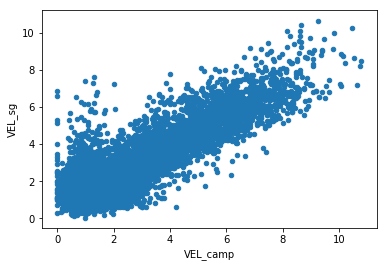

In [55]:
met_2017.plot.scatter(x='VEL_camp', y='VEL_sg')
vel_camp = met_2017[['VEL_camp']].values
vel_sg =met_2017[['VEL_sg']].values
print('scikit r2: %.2f' % r2_score(vel_camp, vel_sg))
person_coeff = stats.pearsonr(vel_camp,vel_sg)
print('Coeficiente de Pearson: %f' % person_coeff[0])

scikit r2: -0.74
Coeficiente de Pearson: 0.329737


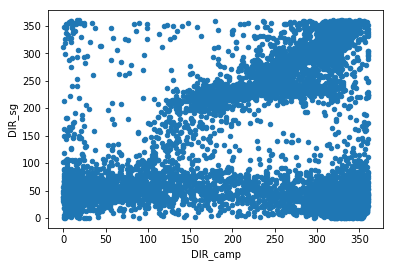

In [65]:
met_2017.plot.scatter(x='DIR_camp', y='DIR_sg')
vel_camp = met_2017[['DIR_camp']].values
vel_sg =met_2017[['DIR_sg']].values
print('scikit r2: %.2f' % r2_score(vel_camp, vel_sg))
person_coeff = stats.pearsonr(vel_camp,vel_sg)
print('Coeficiente de Pearson: %f' % person_coeff[0])

In [60]:
# cargar datos metereologicos de campamento (spence)
# cargar datos metereologicos de sierraGorda (poblado)
name_cols_sg = ['Fecha_sg', 'hora_sg', 'DIR_sg', 'VEL_sg', 'TEMP_sg', 'HR_sg', 'PLUV_sg', 'RAD_SOLAR_sg']
name_cols_camp = ['Fecha_camp', 'hora_camp', 'DIR_camp', 'VEL_camp', 'TEMP_camp', 'HR_camp', 'PLUV_camp', 'RAD_SOLAR_camp']
camp_cols_dtypes = {'Fecha_camp':str, 'hora_camp':str, 'DIR_camp':float, 'VEL_camp':np.float64, 
               'TEMP_camp':np.float64, 'HR_camp':np.float64,'PLUV_camp':np.float64, 
               'RAD_SOLAR_camp':np.float64}
sg_cols_dtypes = {'Fecha_sg':str, 'hora_sg':str, 'DIR_sg':float, 'VEL_sg':np.float64, 
               'TEMP_sg':np.float64, 'HR_sg':np.float64,'PLUV_sg':np.float64, 
               'RAD_SOLAR_sg':np.float64}
met_sg_2018 = pd.read_excel(sierra_folder + 'met_2018_hora.xlsx',usecols=list(range(1,9)),
                            names=name_cols_sg, converters = sg_cols_dtypes)
met_camp_2018 = pd.read_excel(camp_folder + 'met_2018_hora.xlsx', usecols=list(range(1,9)), 
                              names=name_cols_camp, converters = camp_cols_dtypes)


In [61]:
# merge para ver bººbque dias coinciden sg y camp en 2018
met_camp_2018['Fecha_camp'] = pd.to_datetime(met_camp_2018['Fecha_camp'])
met_sg_2018['Fecha_sg'] = pd.to_datetime(met_sg_2018['Fecha_sg'])
met_2018 = pd.merge(met_sg_2018, met_camp_2018, left_on=['Fecha_sg','hora_sg'],right_on=['Fecha_camp', 'hora_camp'])
met_2018[cols_numeric] = met_2018[cols_numeric].apply(pd.to_numeric, errors='coerce')
met_2018 =  met_2018.dropna()

scikit r2: 0.72
Coeficiente de Pearson: 0.858944


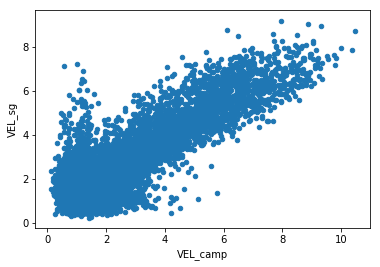

In [62]:
# reg velocidades entre poblado 
met_2018.plot.scatter(x='VEL_camp', y='VEL_sg')
vel_camp = met_2018[['VEL_camp']].values
vel_sg =met_2018[['VEL_sg']].values
print('scikit r2: %.2f' % r2_score(vel_camp, vel_sg))
person_coeff = stats.pearsonr(vel_camp,vel_sg)
print('Coeficiente de Pearson: %f' % person_coeff[0])

In [215]:
# graficos de PM10 desde la base data_dust_hourly.xlsx
data_camilo_path = '../datosCamilo/'
data_camilo = data_camilo_path + 'data_dust_hourly_fin.xlsx'
cols = ['fecha_final', 'SPC_CAMP_MP10','SPC_SG_MP10']
cols_type = {'fecha_final':str, 'SPC_CAMP_MP10':float,'SPC_SG_MP10':float}
df_dust_hourly = pd.read_excel(data_camilo)
df_MP10 = df_dust_hourly[['fecha_final','SPC_CAMP_MP10', 'SPC_SG_MP10']].copy()

In [216]:
PM10_dicc = {}
numData_dicc = {}
df_MP10_wo_nan = df_MP10.dropna()
for month in range(1,13):
    dicc_hour = {}
    numData_hour = {}
    for hour in range(24):
        df_month_hour = df_MP10_wo_nan.loc[(df_MP10_wo_nan['fecha_final'].dt.hour == hour) & 
                                    (df_MP10_wo_nan['fecha_final'].dt.month == month)]
        dicc_hour[hour] = df_month_hour['SPC_CAMP_MP10'].corr(df_month_hour['SPC_SG_MP10'])
        numData_hour[hour] = df_month_hour['SPC_CAMP_MP10'].size
    PM10_dicc[month] = dicc_hour
    numData_dicc[month] = numData_hour

In [221]:
numData_dicc

{1: {0: 183,
  1: 179,
  2: 182,
  3: 182,
  4: 182,
  5: 183,
  6: 183,
  7: 183,
  8: 184,
  9: 183,
  10: 178,
  11: 179,
  12: 178,
  13: 179,
  14: 182,
  15: 183,
  16: 184,
  17: 182,
  18: 182,
  19: 183,
  20: 183,
  21: 183,
  22: 183,
  23: 183},
 2: {0: 137,
  1: 137,
  2: 137,
  3: 137,
  4: 137,
  5: 137,
  6: 137,
  7: 137,
  8: 137,
  9: 136,
  10: 135,
  11: 130,
  12: 131,
  13: 127,
  14: 126,
  15: 127,
  16: 132,
  17: 133,
  18: 134,
  19: 134,
  20: 136,
  21: 136,
  22: 136,
  23: 136},
 3: {0: 87,
  1: 82,
  2: 87,
  3: 87,
  4: 87,
  5: 87,
  6: 87,
  7: 87,
  8: 88,
  9: 88,
  10: 87,
  11: 84,
  12: 84,
  13: 84,
  14: 83,
  15: 84,
  16: 86,
  17: 85,
  18: 86,
  19: 86,
  20: 87,
  21: 87,
  22: 87,
  23: 87},
 4: {0: 108,
  1: 107,
  2: 108,
  3: 107,
  4: 108,
  5: 107,
  6: 107,
  7: 105,
  8: 105,
  9: 107,
  10: 107,
  11: 106,
  12: 103,
  13: 102,
  14: 105,
  15: 108,
  16: 107,
  17: 107,
  18: 108,
  19: 109,
  20: 109,
  21: 109,
  22: 108,
  23

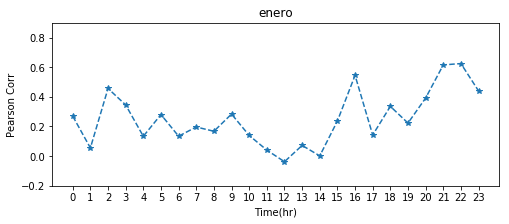

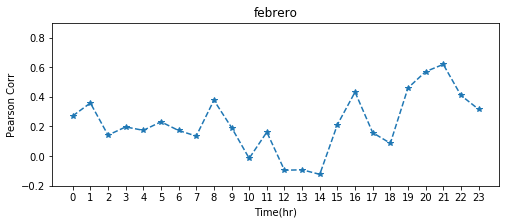

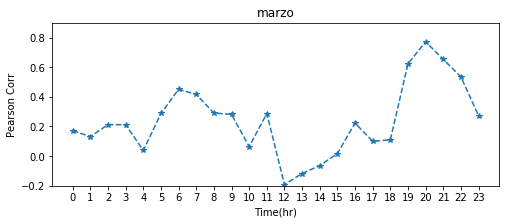

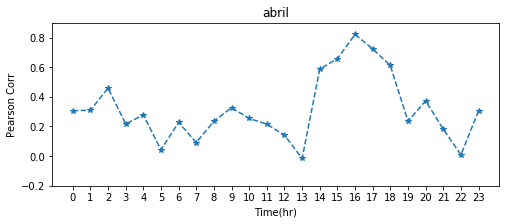

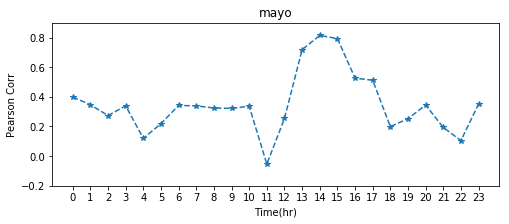

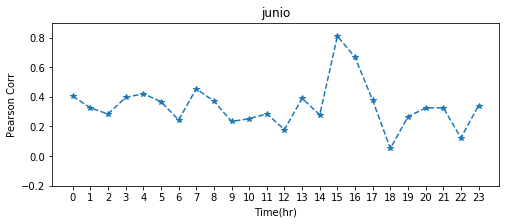

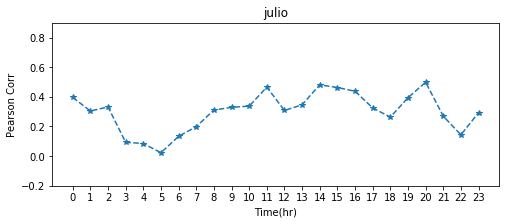

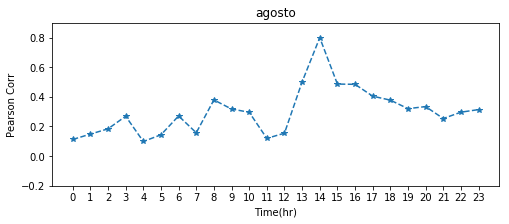

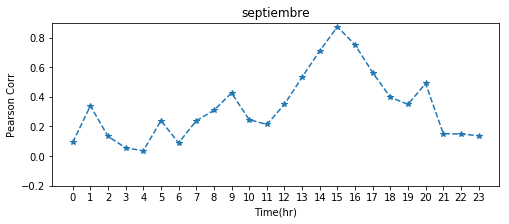

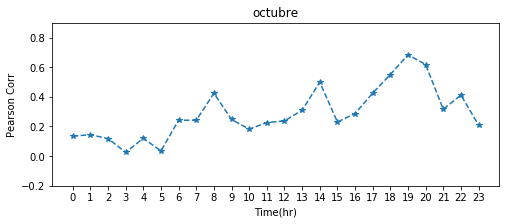

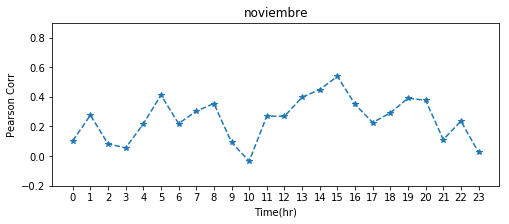

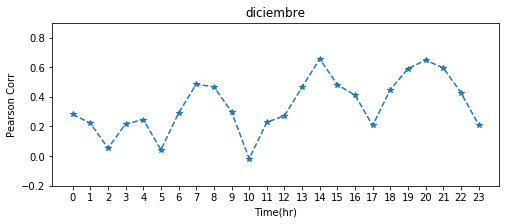

In [222]:
meses = ['enero', 'febrero', 'marzo','abril', 'mayo', 'junio', 
          'julio', 'agosto', 'septiembre', 'octubre','noviembre', 'diciembre']
for month in range(1,13):
    plt.figure(figsize=(8,3))
    corr_by_hour = PM10_dicc[month]
    num_by_hour = numData_dicc[month]
    corr_list = [corr_by_hour[key] for key in range(24)]
    num_list = [num_by_hour[key] for key in range(24)]
    plt.plot(range(24), corr_list, '*--')
    #plt.bar(range(24), num_list)
    plt.ylim(-0.2,0.9)
    plt.xticks(list(range(24)))
    plt.title(meses[month-1])
    plt.xlabel('Time(hr)')
    plt.ylabel('Pearson Corr')
plt.show()

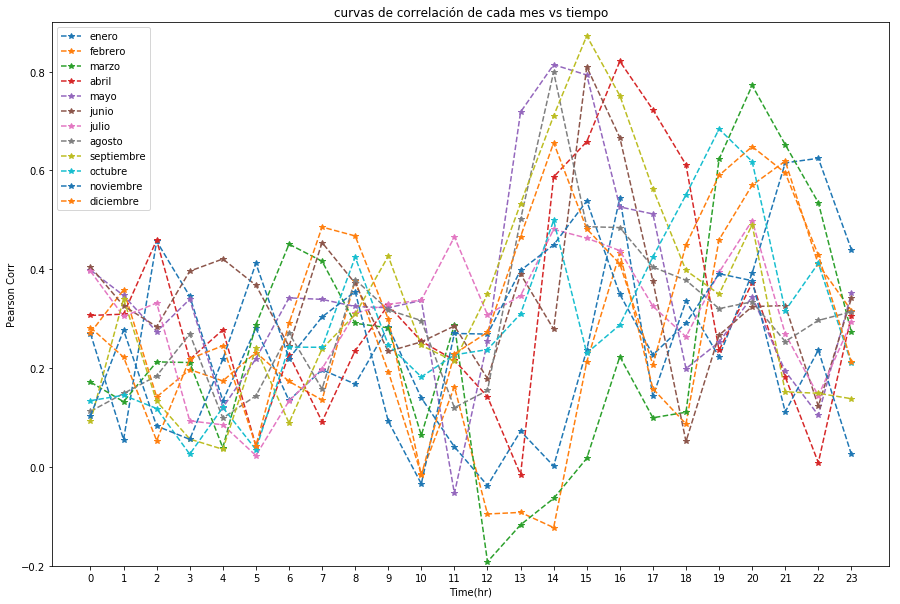

In [218]:
plt.figure(figsize=(15,10))
for month in range(1,13):
    corr_by_hour = PM10_dicc[month]
    corr_list = [corr_by_hour[key] for key in range(24)]
    plt.plot(range(24),corr_list, '*--',label = meses[month-1])
    plt.ylim(-0.2,0.9)
    plt.xticks(list(range(24)))
    plt.xlabel('Time(hr)')
    plt.ylabel('Pearson Corr')
plt.title('curvas de correlación de cada mes vs tiempo')
plt.legend()
plt.show()

In [ ]:
# encontrar lag en tiempo que maximiza la correlacion de MP10 en el tiempo


In [226]:
# ARMA model 
mina_path = data_camilo_path + 'BasePorDiaMina.xlsx'
df_mina = pd.read_excel(mina_path,converters= {'Fecha': pd.to_datetime})

0       10
1       10
2       10
3       10
4       10
5       10
6       10
7       10
8       10
9       10
10      11
11      11
12      11
13      11
14      11
15      11
16      11
17      11
18      11
19      11
20      11
21      11
22      11
23      11
24      11
25      12
26      12
27      12
28      12
29      12
        ..
1998     9
1999     9
2000     9
2001     9
2002     9
2003     9
2004     9
2005     9
2006     9
2007     9
2008     9
2009    10
2010    10
2011    10
2012    10
2013    10
2014    10
2015    10
2016    10
2017    10
2018    10
2019    10
2020    10
2021    10
2022    10
2023    10
2024    10
2025    10
2026    10
2027    10
Name: Fecha, Length: 2028, dtype: int64